In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
tf.set_random_seed(777)

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

keep_prob = tf.placeholder(tf.float32)

In [7]:
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, 10])

In [8]:
L1 = tf.layers.dense(inputs = X, units=512, activation = tf.nn.relu,
                   kernel_initializer=tf.contrib.layers.xavier_initializer())
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

L2 = tf.layers.dense(inputs = L1, units=512, activation = tf.nn.relu,
                   kernel_initializer=tf.contrib.layers.xavier_initializer())
L2 = tf.nn.dropout(L1, keep_prob=keep_prob)

L3 = tf.layers.dense(inputs = L2, units=512, activation = tf.nn.relu,
                   kernel_initializer=tf.contrib.layers.xavier_initializer())
L3 = tf.nn.dropout(L1, keep_prob=keep_prob)

L4 = tf.layers.dense(inputs = L3, units=512, activation = tf.nn.relu,
                   kernel_initializer=tf.contrib.layers.xavier_initializer())
L4 = tf.nn.dropout(L1, keep_prob=keep_prob)

hypothesis = tf.layers.dense(inputs = L4, units=10, activation = None,
                   kernel_initializer=tf.contrib.layers.xavier_initializer())

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch: 0001 cost = 0.334502365
Epoch: 0002 cost = 0.161389352
Epoch: 0003 cost = 0.120233611
Epoch: 0004 cost = 0.098728746
Epoch: 0005 cost = 0.084824093
Epoch: 0006 cost = 0.073719844
Epoch: 0007 cost = 0.065966605
Epoch: 0008 cost = 0.059402435
Epoch: 0009 cost = 0.054398407
Epoch: 0010 cost = 0.051650798
Epoch: 0011 cost = 0.047108654
Epoch: 0012 cost = 0.042778343
Epoch: 0013 cost = 0.039571745
Epoch: 0014 cost = 0.037035680
Epoch: 0015 cost = 0.035372293
Learning finished!
Accuracy:  0.9837
Label:  [2]
Prediction:  [2]


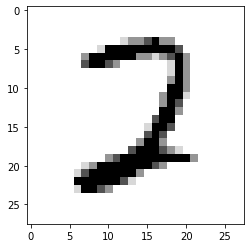

In [11]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print("Learning finished!")

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(
    "Accuracy: ", sess.run(accuracy, feed_dict={
        X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
print(
    "Prediction: ",
    sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1], keep_prob: 1})
)

plt.imshow(
    mnist.test.images[r : r + 1].reshape(28, 28),
    cmap="Greys",
    interpolation="nearest"
)
plt.show()